# Getting Started

## Initial condition

Setting up the initial condition of a simulation is very simple, all you need is create a list of cell objects. In this example we set up a Cartesian grid of 25 cells. Each cell will immediately divides after the simulation starts. We then define a simple plotting function to show the current cell configuration.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cbmos
import cbmos.force_functions as ff
import cbmos.solvers.euler_forward as ef
import cbmos.cell as cl

n_x = 5
n_y = 5
cell_size = 0.5
coordinates = [
    (2*cell_size*i_x, 2*cell_size*i_y)
    for i_x in range(n_x) for i_y in range(n_y)
]

sheet = [
    cl.Cell(
        i, # Cell ID, must be unique to each cell
        [x,y], # Initial coordinates
        -6.0, # Birthtime, in this case 6 hours before the simulation starts
        True, # Whether or not the cell is proliferating
        lambda t: 6 + t # Function generating the next division time
    )
    for i, (x, y) in enumerate(coordinates)
]

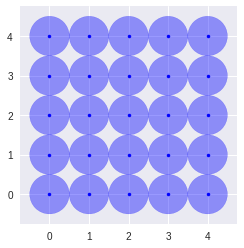

In [2]:
def plot_population(cell_list, color='blue'):
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    for cell in cell_list:
        ax.add_patch(plt.Circle(cell.position ,0.5,color=color, alpha=0.4))
        plt.plot(cell.position[0], cell.position[1], '.', color=color)
    ax.set_aspect('equal')
    plt.show()
    
plot_population(sheet)

## Simulation

In this simulation, we use the Gls force and the Euler forward solver. The force function's parameters are given to the simulate function as a dictionary. Parameters can also be passed to the solver in the same way. This function returns a tuple containing the time points and a list of cells for each of these time points. If needed a detailed log of the division events can be displayed by [setting the log level](https://docs.python.org/3/howto/logging.html) to `debug`.

In [3]:
# Initialize model
model = cbmos.CBModel(ff.Gls(), ef.solve_ivp, dimension=2)

In [4]:
dt = 0.01
t_data = np.arange(0, 4, dt)

t_data, history = model.simulate(
    sheet, # Initial cell configuration
    t_data, # Times at which the history is saved
    {"mu": 5.70, "s": 1.0, "rA": 1.5}, # Force parameters
    {'dt': dt}, # Solver parameters
)

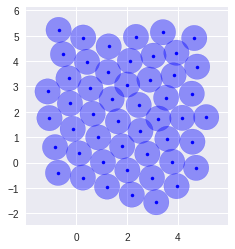

In [5]:
plot_population(history[-1])